In [1]:
                          #COGNIFYZ DATA ANALYST INTERNSHIP

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import folium
from folium.plugins import HeatMap
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Rest.csv')

In [4]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.isna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
df.shape

(9551, 21)

In [11]:
'''
LEVEL 1
TASK1
a) Determine the top three most
common cuisines in the dataset.
'''

'\nLEVEL 1\nTASK1\na) Determine the top three most\ncommon cuisines in the dataset.\n'

In [12]:
a = df['Cuisines'].str.split(',').explode('Cuisines').value_counts().head(5)
a

Cuisines
North Indian     2992
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
Name: count, dtype: int64

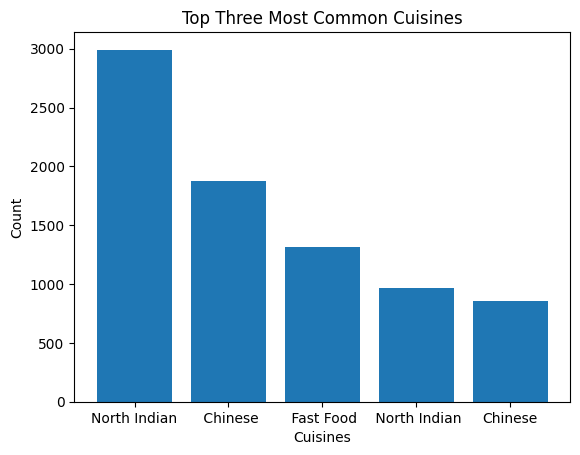

In [13]:
plt.bar(a.index,a.values)
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.title('Top Three Most Common Cuisines')
plt.show()

In [14]:
'''
LEVEL 1
TASK1
b)Calculate the percentage of
restaurants that serve each of the top
cuisines.
'''

'\nLEVEL 1\nTASK1\nb)Calculate the percentage of\nrestaurants that serve each of the top\ncuisines.\n'

In [15]:
b = len(df['Restaurant Name'])
c = (a/b)*100
c

Cuisines
North Indian     31.326563
 Chinese         19.683803
 Fast Food       13.757722
 North Indian    10.135064
Chinese           8.951942
Name: count, dtype: float64

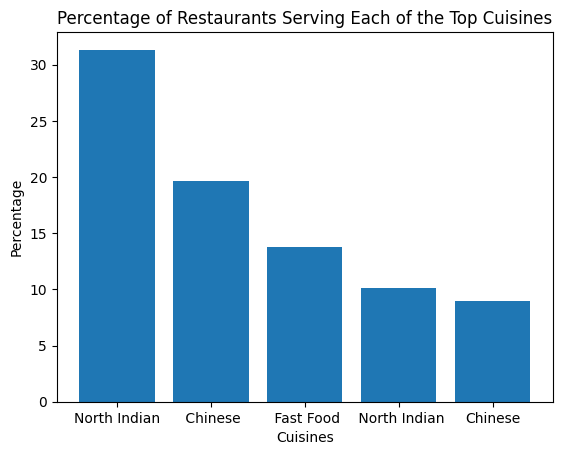

In [16]:
plt.bar(c.index,c.values)
plt.xlabel('Cuisines')
plt.ylabel('Percentage')
plt.title('Percentage of Restaurants Serving Each of the Top Cuisines')
plt.show()

In [17]:
'''
Level 1
Task 2
a
Identify the city with the highest number
of restaurants in the dataset.
'''

'\nLevel 1\nTask 2\na\nIdentify the city with the highest number\nof restaurants in the dataset.\n'

In [18]:
city = df['City'].str.split(',').explode('City').value_counts().head(3)
city

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Name: count, dtype: int64

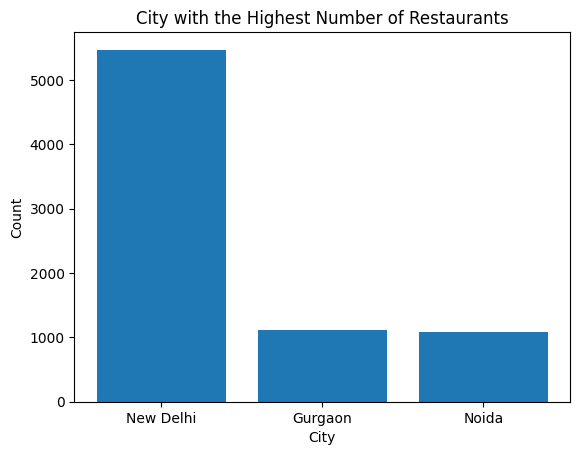

In [19]:
plt.bar(city.index,city.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City with the Highest Number of Restaurants')
plt.show()

In [20]:
'''
Level 1
Task 2
b
Calculate the average rating for restaurants
in each city.
'''

'\nLevel 1\nTask 2\nb\nCalculate the average rating for restaurants\nin each city.\n'

In [21]:
average = df.groupby('City')['Aggregate rating'].mean().head(3)
average

City
Abu Dhabi    4.300000
Agra         3.965000
Ahmedabad    4.161905
Name: Aggregate rating, dtype: float64

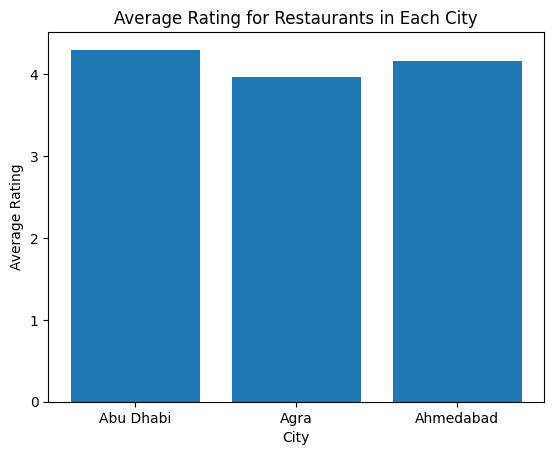

In [22]:
plt.bar(average.index,average.values)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Rating for Restaurants in Each City')
plt.show()

In [23]:
'''
Level 1
Task 2
c
Determine the city with the highest
average rating.
'''

'\nLevel 1\nTask 2\nc\nDetermine the city with the highest\naverage rating.\n'

In [24]:
highest = df.groupby('City')['Aggregate rating'].mean().head(1)
highest

City
Abu Dhabi    4.3
Name: Aggregate rating, dtype: float64

In [25]:
'''
Level 1
Task 3
a
Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.
'''

'\nLevel 1\nTask 3\na\nCreate a histogram or bar chart to\nvisualize the distribution of price ranges\namong the restaurants.\n'

In [26]:
price = df['Price range'].value_counts()
price

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

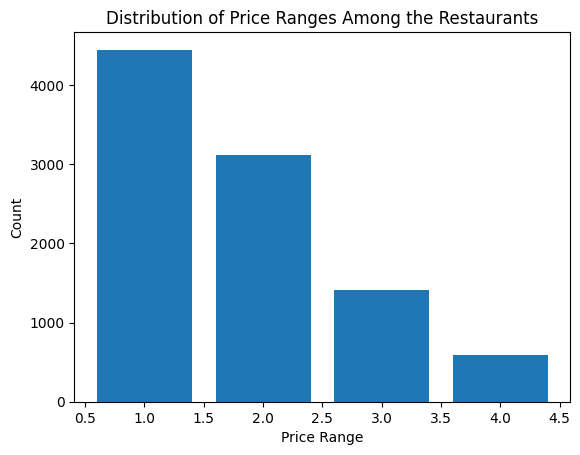

In [27]:
plt.bar(price.index,price.values)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Ranges Among the Restaurants')
plt.show()

In [28]:
'''
Level 1
Task 3
b
Calculate the percentage of restaurants
in each price range category.
'''

'\nLevel 1\nTask 3\nb\nCalculate the percentage of restaurants\nin each price range category.\n'

In [29]:
total_unique = len(df['Restaurant Name'].unique())
total = len(df['Restaurant Name'])

In [30]:
percentage = (price/total)*100
percentage

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

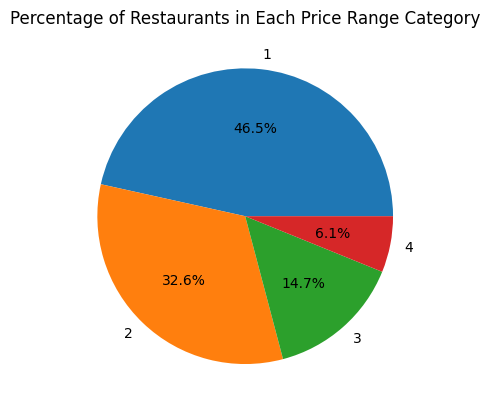

In [31]:
plt.pie(percentage,labels=percentage.index,autopct='%1.1f%%')
plt.title('Percentage of Restaurants in Each Price Range Category')
plt.show()

In [32]:
'''
Level 1
Task 4
a
Determine the percentage of restaurants
that offer online delivery.
'''

'\nLevel 1\nTask 4\na\nDetermine the percentage of restaurants\nthat offer online delivery.\n'

In [33]:
online = df['Has Online delivery'].value_counts()
online

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [34]:
online_percentage = (online/total)*100
online_percentage

Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64

In [35]:
'''
Level 1
Task 4
b
Compare the average ratings of restaurants
with and without online delivery.
'''

'\nLevel 1\nTask 4\nb\nCompare the average ratings of restaurants\nwith and without online delivery.\n'

In [36]:
average = df.groupby('Has Online delivery')['Aggregate rating'].mean()
average

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64

In [37]:
'''
LEVEL 2

TASK 1

Analyze the distribution of aggregate ratings and determine the most common rating range.

'''

'\nLEVEL 2\n\nTASK 1\n\nAnalyze the distribution of aggregate ratings and determine the most common rating range.\n\n'

In [38]:
dist = df['Aggregate rating'].value_counts()
dist.head(10)

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
Name: count, dtype: int64

In [39]:
aa = dist.idxmax()
print('Thwe most common rating range is',aa)


Thwe most common rating range is 0.0


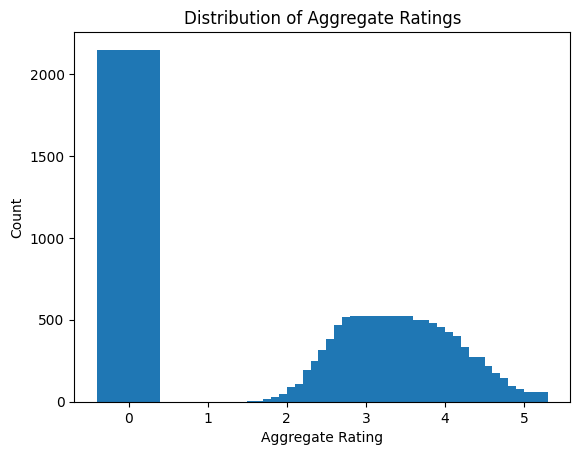

In [40]:
plt.bar(dist.index,dist.values)
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.title('Distribution of Aggregate Ratings')
plt.show()

In [41]:
'''
LEVEL 2

TASK 1
b
Calculate the average number of votes
received by restaurants.
'''

'\nLEVEL 2\n\nTASK 1\nb\nCalculate the average number of votes\nreceived by restaurants.\n'

In [42]:
avg = df['Votes'].mean()
avg

156.909747670401

In [43]:
'''
LEVEL 2

TASK 2
a
Identify the most common combinations of
cuisines in the dataset.
'''

'\nLEVEL 2\n\nTASK 2\na\nIdentify the most common combinations of\ncuisines in the dataset.\n'

In [44]:
common = df['Cuisines'].value_counts().head(5)
common

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [45]:
'''
Task 2
b
Determine if certain cuisine combinations
tend to have higher ratings.
'''

'\nTask 2\nb\nDetermine if certain cuisine combinations\ntend to have higher ratings.\n'

In [46]:
b = df['Cuisines'].str.split(',').explode('Cuisines')

In [47]:
comb = df.groupby(b)['Aggregate rating'].mean().head(5)
comb

Cuisines
 Afghani     1.360000
 African     2.080000
 American    2.677778
 Andhra      2.183333
 Arabian     3.056250
Name: Aggregate rating, dtype: float64

In [48]:
'''
Task 3
a
Plot the locations of restaurants on a
map using longitude and latitude
coordinates.
'''

'\nTask 3\na\nPlot the locations of restaurants on a\nmap using longitude and latitude\ncoordinates.\n'

In [49]:
plot = df[['Longitude','Latitude',]]
plot = pd.DataFrame(plot)
plot

,Longitude,Latitude
0,121.027535,14.565443
1,121.014101,14.553708
2,121.056831,14.581404
3,121.056475,14.585318
4,121.057508,14.584450
...,...,...
9546,28.977392,41.022793
9547,29.041297,41.009847
9548,29.034640,41.055817
9549,29.036019,41.057979


In [50]:
gdf = gpd.GeoDataFrame(plot, geometry=gpd.points_from_xy(plot.Longitude, plot.Latitude))
gdf

,Longitude,Latitude,geometry
0,121.027535,14.565443,POINT (121.02754 14.56544)
1,121.014101,14.553708,POINT (121.01410 14.55371)
2,121.056831,14.581404,POINT (121.05683 14.58140)
3,121.056475,14.585318,POINT (121.05648 14.58532)
4,121.057508,14.584450,POINT (121.05751 14.58445)
...,...,...,...
9546,28.977392,41.022793,POINT (28.97739 41.02279)
9547,29.041297,41.009847,POINT (29.04130 41.00985)
9548,29.034640,41.055817,POINT (29.03464 41.05582)
9549,29.036019,41.057979,POINT (29.03602 41.05798)


<Axes: >

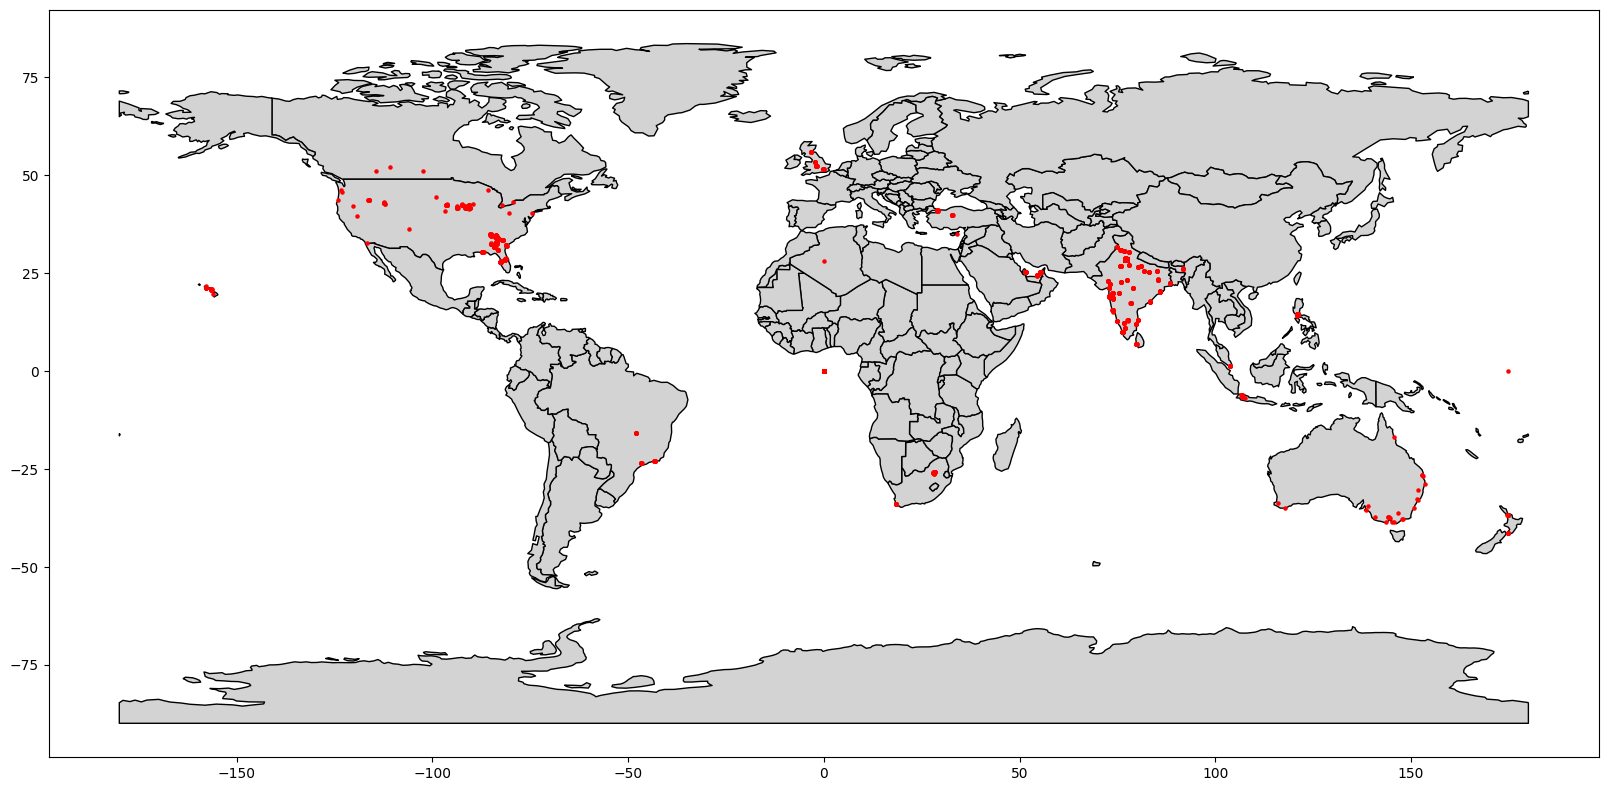

In [51]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) # Call read_file directly from geopandas
ax = world.plot(figsize=(20, 12), color='lightgray', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=5)

In [52]:
'''
Task3
b
Identify any patterns or clusters of
restaurants in specific areas.
'''

'\nTask3\nb\nIdentify any patterns or clusters of\nrestaurants in specific areas.\n'

In [53]:
map = folium.Map(location = [plot['Latitude'].mean(),plot['Longitude'].mean()], zoom_start=1,height= '100%', width = '100%')
heat_marker = [[row['Latitude'], row['Longitude']] for i, row in plot.iterrows()]
HeatMap(heat_marker, radius=15).add_to(map)
map

In [54]:
'''
Level 2

Task 4
a
Identify if there are any restaurant chains
present in the dataset.
'''

'\nLevel 2\n\nTask 4\na\nIdentify if there are any restaurant chains\npresent in the dataset.\n'

In [55]:
chain =df.groupby('Restaurant Name').size().reset_index(name='Count')
new = chain[chain['Count']>1]
chains = new.sort_values(by='Count',ascending=False)
top = chains.head(5)
top

,Restaurant Name,Count
1098,Cafe Coffee Day,83
2098,Domino's Pizza,79
6106,Subway,63
2716,Green Chick Chop,51
4077,McDonald's,48


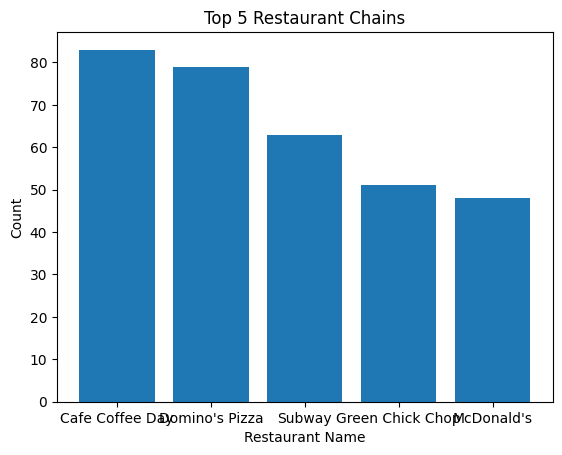

In [56]:
plt.bar(top['Restaurant Name'],top['Count'])
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.title('Top 5 Restaurant Chains')
plt.show()

In [57]:
'''
Level 2

Task 4

b

Analyze the ratings and popularity of
different restaurant chains.

'''

'\nLevel 2\n\nTask 4\n\nb\n\nAnalyze the ratings and popularity of\ndifferent restaurant chains.\n\n'

In [58]:
Rat = df.groupby('Restaurant Name')['Aggregate rating'].mean().reset_index(name='Rating').sort_values(by='Rating',ascending=False)
Rat

,Restaurant Name,Rating
5322,Restaurant Mosaic @ The Orient,4.9
4177,Ministry of Crab,4.9
4135,Miann,4.9
5757,Shorts Burger and Shine,4.9
4165,Milse,4.9
...,...,...
1105,Cafe Corner,0.0
4905,Pheva Tandooris,0.0
4913,Pick & Carry,0.0
1096,Cafe Brownie,0.0


In [59]:
pop = df.groupby('Restaurant Name')['Votes'].mean().reset_index(name='Popularity').sort_values(by='Popularity',ascending=False)
pop

,Restaurant Name,Popularity
6943,Toit,10934.0
2879,Hauz Khas Social,7931.0
4902,Peter Cat,7574.0
783,Big Brewsky,5705.0
6449,The Black Pearl,5385.0
...,...,...
1181,Cafe Treat,0.0
5235,Ralhan Eating Corner,0.0
5232,Raju Vaishno Amritsari Dhaba,0.0
6612,The Golden Spoon,0.0


In [60]:
cc = pd.merge(Rat,pop,on='Restaurant Name')
cc

,Restaurant Name,Rating,Popularity
0,Restaurant Mosaic @ The Orient,4.9,85.0
1,Ministry of Crab,4.9,203.0
2,Miann,4.9,281.0
3,Shorts Burger and Shine,4.9,820.0
4,Milse,4.9,754.0
...,...,...,...
7441,Cafe Corner,0.0,3.0
7442,Pheva Tandooris,0.0,0.0
7443,Pick & Carry,0.0,2.0
7444,Cafe Brownie,0.0,3.0


In [63]:
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [62]:
'''
Level 3
Task1
a
Analyze the text reviews to identify the most
common positive and negative keywords.
'''

'\nLevel 3\nTask1 \na\nAnalyze the text reviews to identify the most\ncommon positive and negative keywords.\n'

In [67]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [88]:
aa = df.groupby('Rating text')['Rating text'].count()
ab = pd.DataFrame(aa)
ac = ab.rename(columns={'Rating text': 'Rating_Count'})
ac.sort_values(by='Rating_Count',ascending=False)

,Rating_Count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


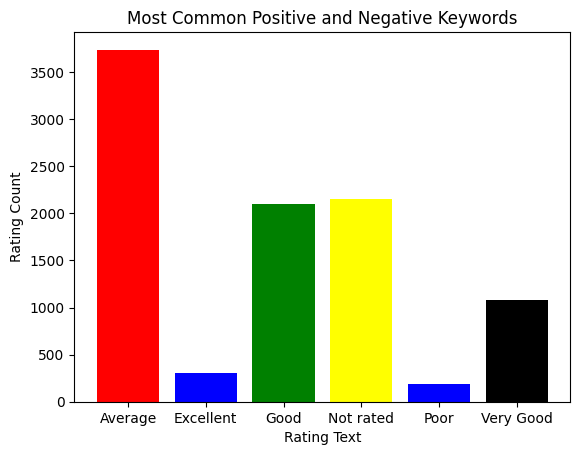

In [97]:
plt.bar(ac.index,ac['Rating_Count'],color = ['Red','Blue','Green','Yellow','Blue','Black'])
plt.xlabel('Rating Text')
plt.ylabel('Rating Count')
plt.title('Most Common Positive and Negative Keywords')
plt.show()

In [94]:
'''
Level 3
Task 1
b
Calculate the average length of reviews and
explore if there is a relationship between
review length and rating
'''

'\nLevel 3\nTask 1\nb\nCalculate the average length of reviews and\nexplore if there is a relationship between\nreview length and rating\n'

In [99]:
'''
Level 3
Task2
a
Identify the restaurants with the highest and
lowest number of votes.
'''

'\nLevel 3\nTask2 \na\nIdentify the restaurants with the highest and\nlowest number of votes.\n'

In [102]:
votes_top_5 = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False).head(5)
votes_top_5

Restaurant Name
Barbeque Nation              28142
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Farzi Cafe                   10098
Name: Votes, dtype: int64

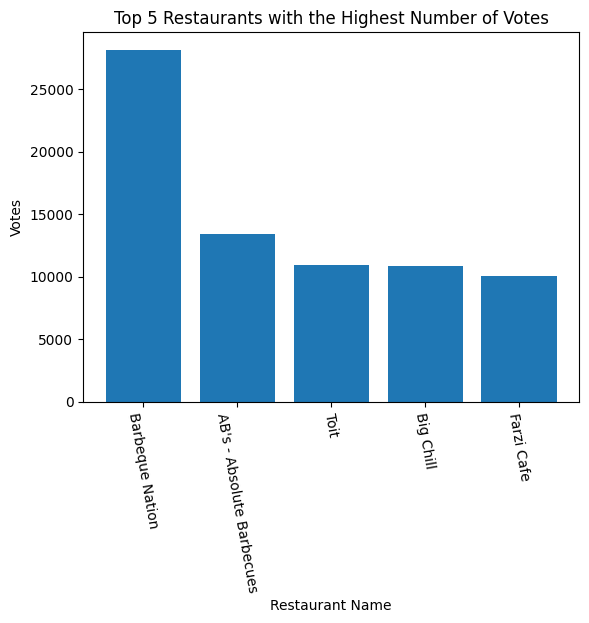

In [105]:
plt.bar(votes_top_5.index,votes_top_5.values)
plt.xlabel('Restaurant Name')
plt.xticks(rotation=-80)
plt.ylabel('Votes')
plt.title('Top 5 Restaurants with the Highest Number of Votes')
plt.show()

In [114]:
votes_bottom_5 = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=True).head(5)
votes_bottom_5

Restaurant Name
Laxmi Food Corner        0
Best Biryani Centre      0
Best Chicken Corner      0
Best Pizza Hut           0
Better Butter Chicken    0
Name: Votes, dtype: int64

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

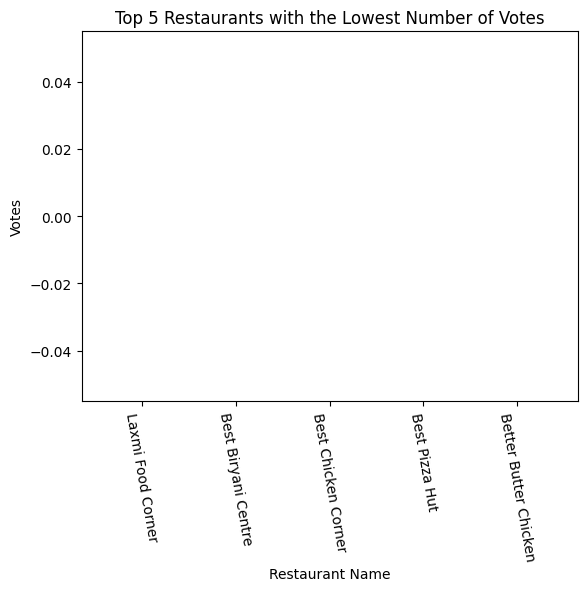

In [115]:
plt.bar(votes_bottom_5.index,votes_bottom_5.values)
plt.xlabel('Restaurant Name')
plt.xticks(rotation=-80)
plt.ylabel('Votes')
plt.title('Top 5 Restaurants with the Lowest Number of Votes')
plt

In [116]:
'''
Level 3
Task 2
b
Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.
'''

'\nLevel 3\nTask 2\nb\nAnalyze if there is a correlation between the\nnumber of votes and the rating of a\nrestaurant.\n'

In [121]:
correlation = np.corrcoef(df['Votes'],df['Aggregate rating'])
correlation = pd.DataFrame(correlation)
correlation

,0,1
0,1.000000,0.313691
1,0.313691,1.000000


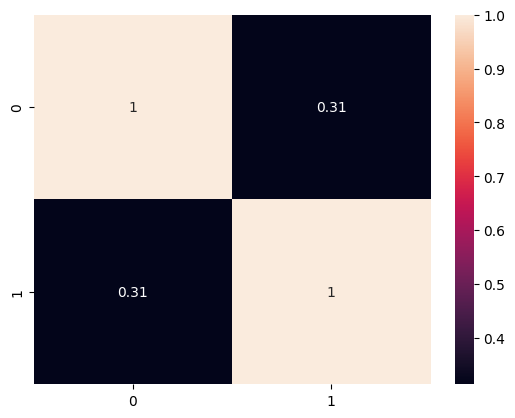

In [123]:
sns.heatmap(correlation,annot=True)
plt.show()

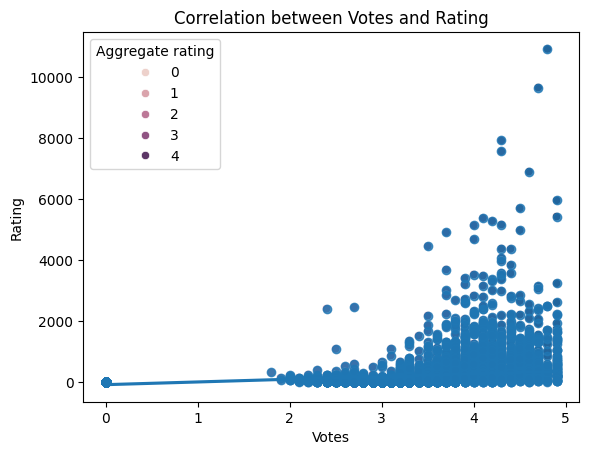

In [125]:
sns.scatterplot(x='Aggregate rating',y='Votes',hue = 'Aggregate rating',data=df)
sns.regplot(x='Aggregate rating',y='Votes',data=df)
plt.title('Correlation between Votes and Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

In [126]:
'''
Level 3
Task 3

Task: Price Range vs. Online Delivery and
Table Booking

a
Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.
'''

'\nLevel 3\nTask 3\n\nTask: Price Range vs. Online Delivery and\nTable Booking\n\na\nAnalyze if there is a relationship between the\nprice range and the availability of online\ndelivery and table booking.\n'

In [129]:
aaa = df.groupby('Price range')['Has Table booking'].value_counts()
aaa = pd.DataFrame(aaa)
bbb = df.groupby('Price range')['Has Online delivery'].value_counts()
bbb = pd.DataFrame(bbb)

In [133]:
aaa.sort_values(by='Price range',ascending=False).head(20)

count
Price range Has Table booking       
4           No                   312
            Yes                  274
3           No                   764
            Yes                  644
2           No                  2874
            Yes                  239
1           No                  4443
            Yes                    1

In [135]:
bbb.sort_values(by='Price range',ascending=False).head(20)

count
Price range Has Online delivery       
4           No                     533
            Yes                     53
3           No                     997
            Yes                    411
2           No                    1827
            Yes                   1286
1           No                    3743
            Yes                    701

In [139]:
'''
Task 3

b

Determine if higher-priced restaurants are
more likely to offer these services.
'''

'\nTask 3\n\nb\n\nDetermine if higher-priced restaurants are\nmore likely to offer these services.\n'

In [117]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [155]:
'''
The Restaurant having Average cost less than 10000 doesn't provide these services
'''

"\nThe Restaurant having Average cost less than 10000 doesn't provide these services\n"

In [157]:
x1 = df['Has Online delivery']
x2 = df['Has Table booking']
y  = df['Average Cost for two']

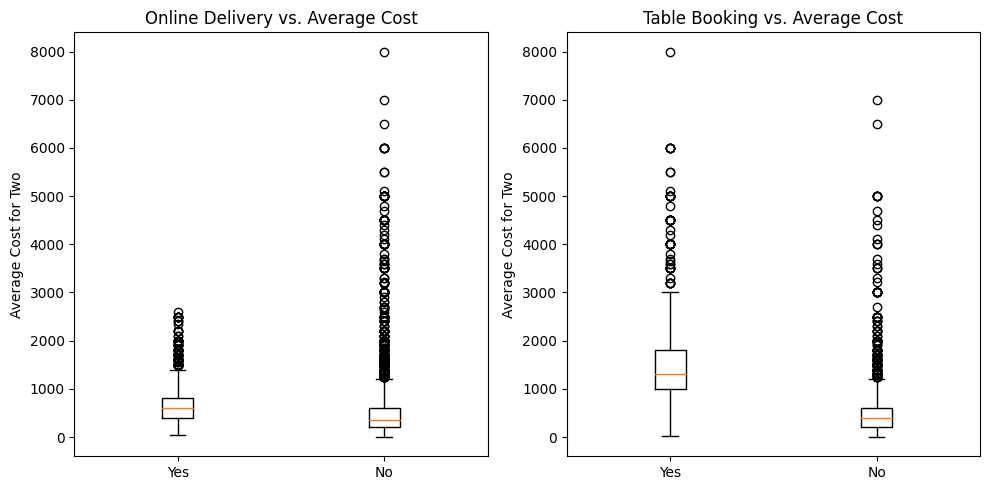

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

# Online Delivery
plt.subplot(1,2,1)
df_online = df[df['Average Cost for two'] < 10000]
plt.boxplot([df_online[df_online['Has Online delivery'] == 'Yes']['Average Cost for two'],
             df_online[df_online['Has Online delivery'] == 'No']['Average Cost for two']],
            labels=['Yes', 'No'])
plt.title('Online Delivery vs. Average Cost')
plt.ylabel('Average Cost for Two')

# Table Booking
plt.subplot(1,2,2)
df_booking = df[df['Average Cost for two'] < 10000]
plt.boxplot([df_booking[df_booking['Has Table booking'] == 'Yes']['Average Cost for two'],
             df_booking[df_booking['Has Table booking'] == 'No']['Average Cost for two']],
            labels=['Yes', 'No'])
plt.title('Table Booking vs. Average Cost')
plt.ylabel('Average Cost for Two')

plt.tight_layout()
plt.show()